In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import tkinter as tk
from tkinter import filedialog

In [83]:
def low_pass_filter(data, fs, cutoff=10, order=4):
    nyq = fs / 2  
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return signal.filtfilt(b, a, data)
   


In [84]:
def high_pass_filter(data, fs, cutoff=1, order=4):
    nyq = fs / 2
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return signal.filtfilt(b, a, data)

In [85]:
def compute_psd(data, fs):
    f, Pxx = signal.welch(data, fs, nperseg=170)
    return f, Pxx


In [86]:
root = tk.Tk()
root.withdraw()  # Hide the main Tkinter window

file_path = filedialog.askopenfilename(title="Select Dataset File", filetypes=[("CSV files", "*.csv")])

    

   Time [s]       II    PLETH     RESP        V      AVR
0     0.000  0.14453  0.63636  0.04059  0.83529  0.74414
1     0.008  0.15625  0.65689  0.04059  0.83529  0.74023
2     0.016  0.15625  0.67351  0.04059  0.84118  0.74023
3     0.024  0.16016  0.68817  0.04059  0.84510  0.73438
4     0.032  0.16016  0.69990  0.04059  0.84510  0.73438


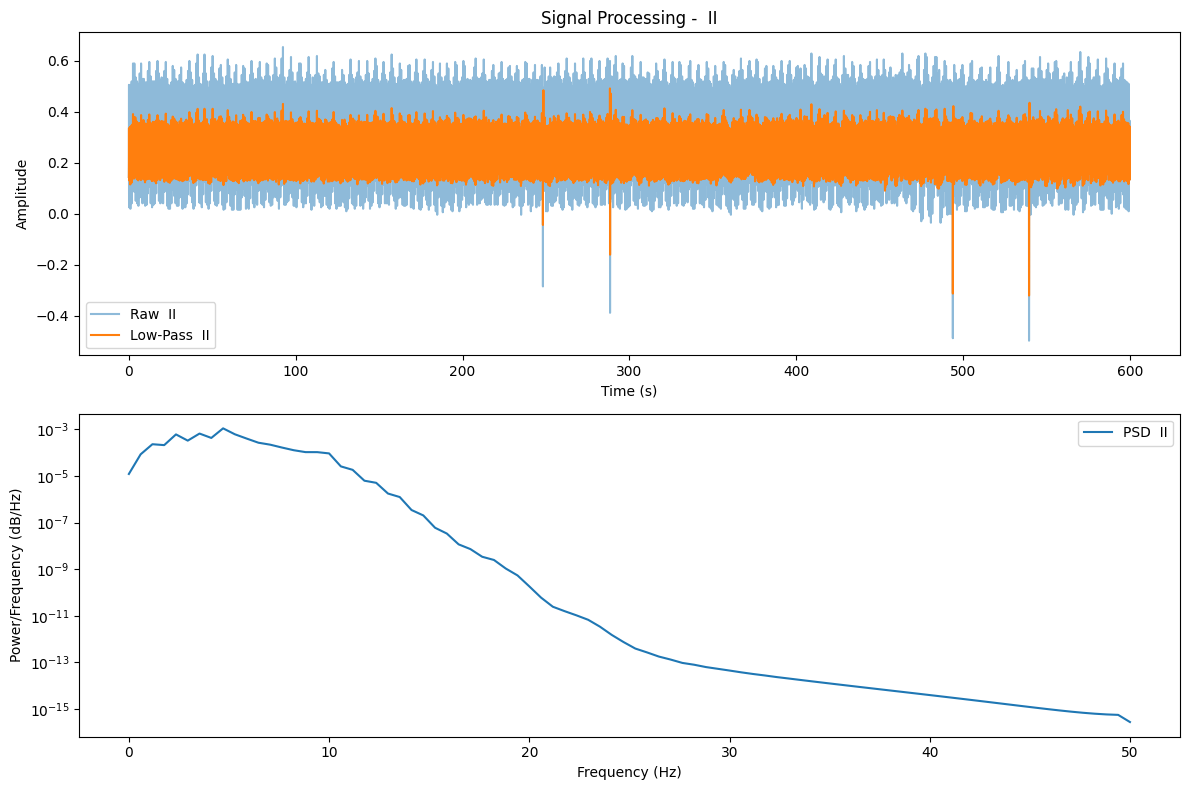

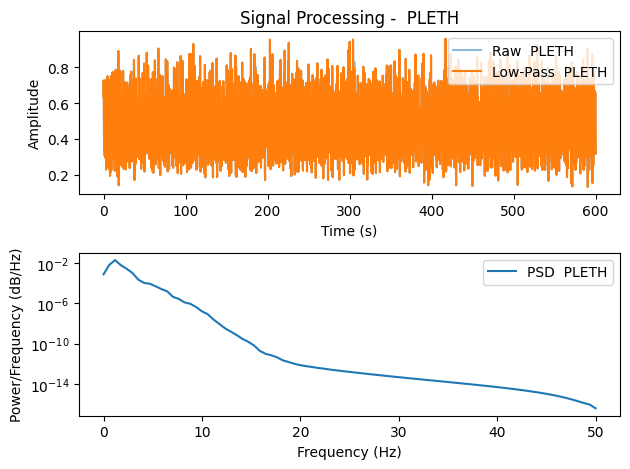

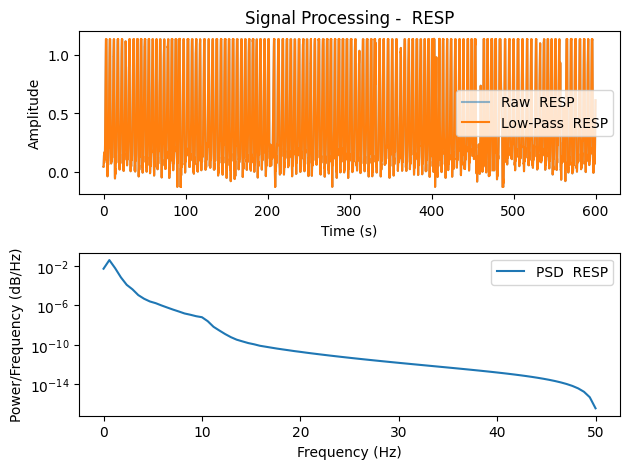

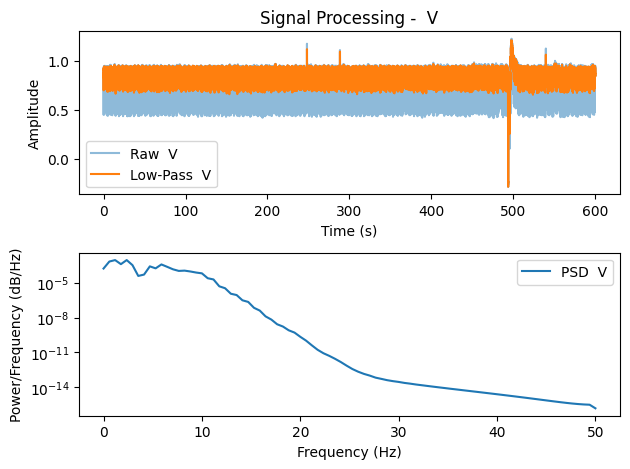

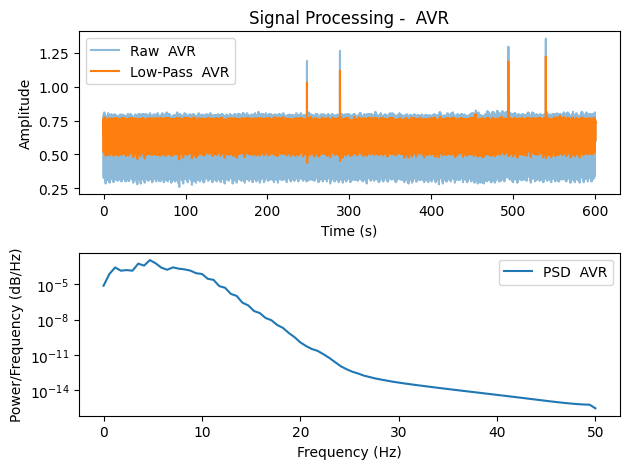

In [87]:
if file_path:
    df = pd.read_csv(file_path)
    print(df.head())  # Show first few rows
    
    fs = 100  # Define sampling frequency
    time = np.arange(0, len(df) / fs, 1 / fs)
    

    plt.figure(figsize=(12, 8))

    # Process each signal column (assuming the first column is time or index)
    for column in df.columns[1:]:
        raw_signal = df[column].dropna().values  # Drop NaN values (if any)

        # Apply filters
        low_filtered = low_pass_filter(raw_signal, fs=fs)
        high_filtered = high_pass_filter(raw_signal, fs=fs)

        # Plot original vs. filtered signals
        plt.subplot(2, 1, 1)
        plt.plot(time[:len(raw_signal)], raw_signal, label=f'Raw {column}', alpha=0.5)
        plt.plot(time[:len(low_filtered)], low_filtered, label=f'Low-Pass {column}', linewidth=1.5)
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Signal Processing - {column}")
        plt.legend()
        f, Pxx = compute_psd(low_filtered, fs=fs)
        plt.subplot(2, 1, 2)
        plt.semilogy(f, Pxx, label=f'PSD {column}')
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Power/Frequency (dB/Hz)")
        plt.legend()

        plt.tight_layout()
        plt.show()

else:
    print("No file selected.")

   Time [s]     RESP    PLETH        V      AVR       II
0     0.000  0.35386  0.43597  0.52549  0.30392  0.72549
1     0.008  0.35679  0.43206  0.51961  0.33529  0.67059
2     0.016  0.35875  0.42815  0.51569  0.37451  0.60980
3     0.024  0.36168  0.42424  0.50588  0.41961  0.55098
4     0.032  0.36364  0.42131  0.50980  0.44902  0.50000


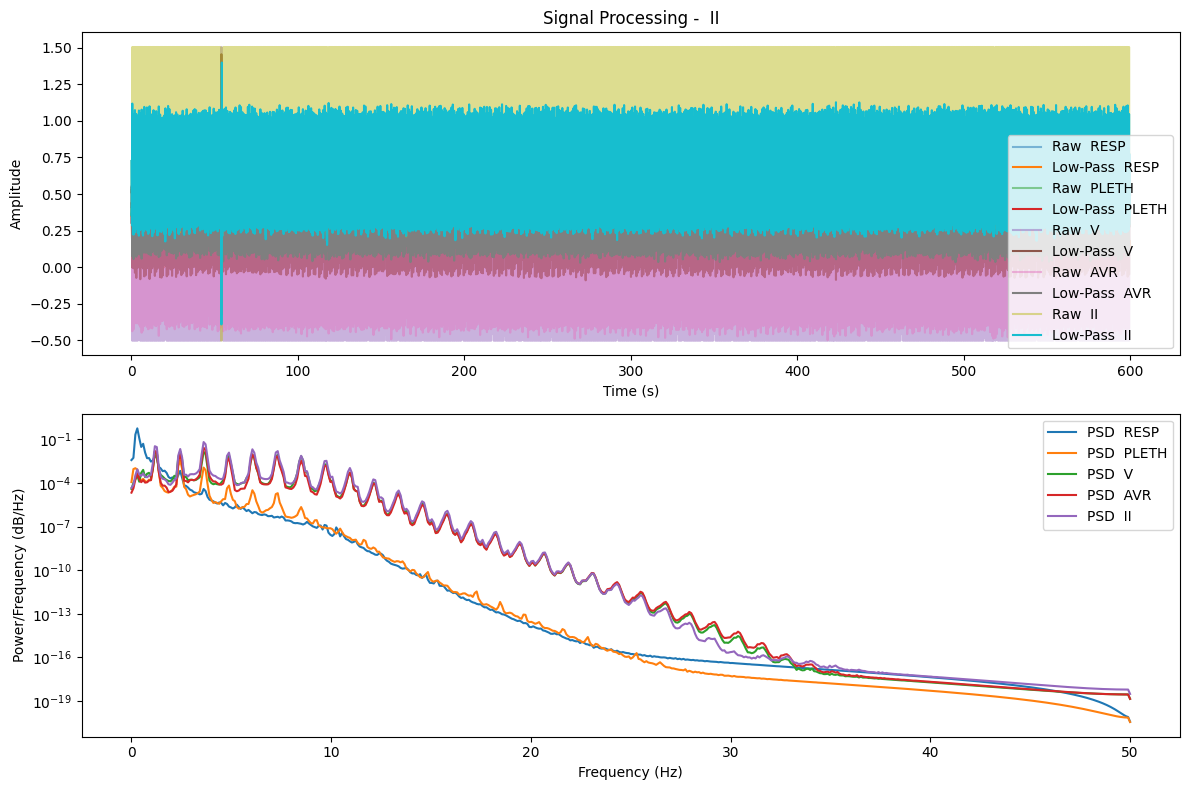

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import tkinter as tk
from tkinter import filedialog


def low_pass_filter(data, fs, cutoff=10, order=4):#low pass filtering function
    nyq = fs / 2  
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return signal.filtfilt(b, a, data)


def high_pass_filter(data, fs, cutoff=1, order=4):#High pass filtering function 
    nyq = fs / 2
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return signal.filtfilt(b, a, data)


def compute_psd(data, fs):#function to compute power spectral density
    f, Pxx = signal.welch(data, fs, nperseg=1024)
    return f, Pxx

# Open a file dialog to select the CSV file
root = tk.Tk()
root.withdraw()  

file_path = filedialog.askopenfilename(title="Select Dataset File", filetypes=[("CSV files", "*.csv")])

# Load the dataset
if file_path:
    df = pd.read_csv(file_path)
    print(df.head())  
    
    fs = 100  
    time = np.arange(0, len(df) / fs, 1 / fs)

    plt.figure(figsize=(12, 8))

  
    for column in df.columns[1:]:
        raw_signal = df[column].dropna().values  # Drop NaN values (if any)

        # Apply filters
        low_filtered = low_pass_filter(raw_signal, fs=fs)
        high_filtered = high_pass_filter(raw_signal, fs=fs)

      
        plt.subplot(2, 1, 1)
        plt.plot(time[:len(raw_signal)], raw_signal, label=f'Raw {column}', alpha=0.5)
        plt.plot(time[:len(low_filtered)], low_filtered, label=f'Low-Pass {column}', linewidth=1.5)
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Signal Processing - {column}")
        plt.legend()

    
        f, Pxx = compute_psd(low_filtered, fs=fs)
        plt.subplot(2, 1, 2)
        plt.semilogy(f, Pxx, label=f'PSD {column}')
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Power/Frequency (dB/Hz)")
        plt.legend()

    plt.tight_layout()
    plt.show()

else:
    print("No file selected.")


In [48]:
a=10
b=20
print(a+b)

30
